# Model description

Consider the $m$-layer MLP model

$$
\begin{align}
\mathbf{g}^{(\ell)}(\mathbf{x}) = &
\mathbf{W}^{(\ell)}\mathbf{h}^{(\ell-1)}(\mathbf{x})+\mathbf{b}^{(\ell)}, \\
\mathbf{h}^{(\ell)}(\mathbf{x}) = &
\phi(\mathbf{g}^{(\ell)}(\mathbf{x})),
\end{align}
$$

for $\ell\in\{1,2,\dots,m\}$. In the above notation, $\mathbf{x}\in\mathbb{R}^{n}$ is the input vector, $\mathbf{W}^{(\ell)}$ the weight matrix and $\mathbf{b}^{(\ell)}$ the bias vector at the $\ell$-the layer, and $\phi:\mathbb{R}\rightarrow\mathbb{R}$ a non-linear activation function. It is assumed that $\mathbf{h}^{(0)}(\mathbf{x}):=\mathbf{x}$. The output $\mathbf{h}^{(m)}(\mathbf{x})$ of the final $m$-th layer is compared against the label data $\mathbf{y}$.

Normal priors are assumed for the weights $\mathbf{W}^{(\ell)}$ and biases $\mathbf{b}^{(\ell)}$:

$$
\begin{align}
\mathbf{W}^{(\ell)} \sim &
\mathcal{N}(\boldsymbol{\xi}_w^{(\ell)},\mathbf{u}_w^{(\ell)}\mathbf{I}), \\
\mathbf{b}^{(\ell)} \sim &
\mathcal{N}(\boldsymbol{\xi}_b^{(\ell)},\mathbf{u}_b^{(\ell)}\mathbf{I}).
\end{align}
$$

The variables $\{\boldsymbol{\xi}_w^{(\ell)},\mathbf{u}_w^{(\ell)},\boldsymbol{\xi}_b^{(\ell)},\mathbf{u}_b^{(\ell)}\}$ are the model hyper-parameters, which are assumed to by known.

The mean-field variational family for the $m$-layer MLP model is induced by the normality assumptions

$$
\begin{align}
\mathbf{W}^{(\ell)} \sim &
\mathcal{N}(\boldsymbol{\mu}_w^{(\ell)},\mathbf{v}_w^{(\ell)}\mathbf{I}), \\
\mathbf{b}^{(\ell)} \sim &
\mathcal{N}(\boldsymbol{\mu}_b^{(\ell)},\mathbf{v}_b^{(\ell)}\mathbf{I}).
\end{align}
$$

The variables $\{\boldsymbol{\mu}_w^{(\ell)},\mathbf{v}_w^{(\ell)},\boldsymbol{\mu}_b^{(\ell)},\mathbf{v}_b^{(\ell)}\}$ are the variational hyper-parameters, which are inferred via optimization.

# Identification of data, parameters and hyper-parameters

| Concept                      | Math notation         | Example: notation       |
| :---                         | :---                  | :---                    |
| Data                         | $\mathbf{x}$          | $\mathbf{x},\mathbf{y}$ |
| Model parameters             | $z$                   | $\{\mathbf{W}^{(\ell)},\mathbf{b}^{(\ell)}\}$ |
| Variational hyper-parameters | $\boldsymbol{\phi}$   | $\{\boldsymbol{\mu}_w^{(\ell)},\mathbf{v}_w^{(\ell)},\boldsymbol{\mu}_b^{(\ell)},\mathbf{v}_b^{(\ell)}\}$ |
| Model hyper-parameters       | $\boldsymbol{\theta}$ | $\{\boldsymbol{\xi}_w^{(\ell)},\mathbf{u}_w^{(\ell)},\boldsymbol{\xi}_b^{(\ell)},\mathbf{u}_b^{(\ell)}\}$ |

# Example setup

An MLP with a single hidden layer is considered, so $m=2$. The MLP used throughout the tutorial is visualized below.

In [1]:
from viznet import NodeBrush, EdgeBrush, DynamicShow

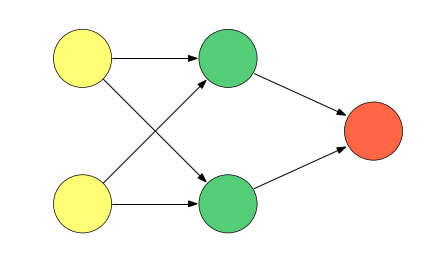

In [2]:
# https://viznet.readthedocs.io/en/latest/tutorials.html#tutorial

try:
    with DynamicShow() as d:
        brush = NodeBrush('nn.input', size=0.2)
        x1  = brush >> (1, 0)  # paint a node at (x=1, y=0)
        x2  = brush >> (1, 1)
        brush = NodeBrush('nn.hidden', size=0.2)
        h11 = brush >> (2, 0)
        h12 = brush >> (2, 1)
        brush = NodeBrush('nn.output', size=0.2)
        h21 = brush >> (3, 0.5)
    
        edge = EdgeBrush('-->', lw=1)
        edge >> (x1, h11)
        edge >> (x1, h12)
        edge >> (x2, h11)
        edge >> (x2, h12)
        edge >> (h11, h21)
        edge >> (h12, h21)
except TypeError as e:
    pass

The input data are associated with an XOR, so $n=2$, which means that each input vector $\mathbf{x}\in\mathbb{R}$ is a two-length vector. A total of four samples make the XOR dataset used in this example. The input matrix is

$\begin{pmatrix}0 & 0 \\ 0 & 1 \\ 1 & 0\\ 1 & 1\end{pmatrix}$

and each row of the matrix corresponds to a single input datum $\mathbf{x}^T$.

The respective labels are

$\begin{pmatrix}0 \\ 1\\ 1\\ 0\end{pmatrix},$

and each element of the vector corresponds to a scalar output datum $y$ (note that in the implementation the output is a one-length vector $\mathbf{y}$).

The MLP of this example is given by

$$
\begin{align}
\mathbf{g}^{(1)}(\mathbf{x}) = &
\mathbf{W}^{(1)}\mathbf{h}^{(0)}(\mathbf{x})+\mathbf{b}^{(1)}, \\
\mathbf{h}^{(1)}(\mathbf{x}) = &
\phi(\mathbf{g}^{(1)}(\mathbf{x})), \\
\mathbf{g}^{(2)}(\mathbf{x}) = &
\mathbf{W}^{(2)}\mathbf{h}^{(1)}(\mathbf{x})+\mathbf{b}^{(2)}, \\
\mathbf{h}^{(2)}(\mathbf{x}) = &
\phi(\mathbf{g}^{(2)}(\mathbf{x})),
\end{align}
$$

where $\phi$ is the sigmoid activation function.

The following table gives the dimensions of all the involved variables

| Variable           | Dimensions  |
| :---               | :---        |
| $\mathbf{x}$       | $2\times 1$ |
| $\mathbf{W}^{(1)}$ | $2\times 2$ |
| $\mathbf{b}^{(1)}$ | $2\times 1$ |
| $\mathbf{g}^{(1)}$ | $2\times 1$ |
| $\mathbf{h}^{(1)}$ | $2\times 1$ |
| $\mathbf{W}^{(2)}$ | $1\times 2$ |
| $\mathbf{b}^{(2)}$ | $1\times 1$ |
| $\mathbf{g}^{(2)}$ | $1\times 1$ |
| $\mathbf{h}^{(2)}$ | $1\times 1$ |

As for the model hyper-parameters, zero means ($\boldsymbol{\xi}_w^{(\ell)}=\mathbf{0},\boldsymbol{\xi}_b^{(\ell)}=\mathbf{0}$) and unit variances ($\mathbf{u}_w^{(\ell)}=\mathbf{1},\mathbf{u}_b^{(\ell)}=\mathbf{1}$) are assumed.

# Load packages

In [1]:
import numpy as np

import torch
import torch.distributions.constraints as constraints
import torch.nn as nn
import torch.nn.functional as F

import pyro
import pyro.distributions as dist
from pyro.infer import EmpiricalMarginal, SVI, Trace_ELBO, TracePredictive
from pyro.optim import Adam

import matplotlib.pyplot as plt
import seaborn as sms

# Define data

In [2]:
x_data = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float)
y_data = torch.tensor([0, 1, 1, 0])

# Define model

In [3]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.input_size = input_size
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        g1 = self.fc1(x)
        h1 = torch.sigmoid(g1)
        g2 = self.fc2(h1)
        h2 = torch.sigmoid(g2)
        return h2

In [4]:
def normal(*shape):
    return dist.Normal(torch.zeros(*shape), torch.ones(*shape)).to_event(len(*shape))

In [5]:
def model(mlp, x_data, y_data):
    fc1w_prior = normal(list(mlp.fc1.weight.shape))
    fc1b_prior = normal(list(mlp.fc1.bias.shape))
    
    fc2w_prior = normal(list(mlp.fc2.weight.shape))
    fc2b_prior = normal(list(mlp.fc2.bias.shape))
    
    priors = {"fc1.weight": fc1w_prior, "fc1.bias": fc1b_prior, "fc2.weight": fc2w_prior, "fc2.bias": fc2b_prior}
    
    lifted_module = pyro.random_module('mlp', mlp, priors)

    lifted_mlp_model = lifted_module()

    with pyro.plate("data", len(x_data)):
        lhat = F.log_softmax(lifted_mlp_model(x_data), dim=0)
        
        pyro.sample("y", dist.Categorical(logits=lhat.view(-1)), obs=y_data)
        
        return lhat

# Define variational family

In [6]:
def variational_normal(name, activation, *shape):
    loc = pyro.param(name+"_loc", torch.randn(*shape))
    scale = pyro.param(name+"_scale", torch.ones(*shape), constraint=constraints.positive)
    return dist.Normal(loc, activation(scale)).to_event(len(*shape))

In [7]:
def variational_family(mlp, x_data, y_data):
    fc1w_density = variational_normal("fc1_weight", nn.Softplus(), list(mlp.fc1.weight.shape))
    fc1b_density = variational_normal("fc1_bias", nn.Softplus(), list(mlp.fc1.bias.shape))

    fc2w_density = variational_normal("fc2_weight", nn.Softplus(), list(mlp.fc2.weight.shape))
    fc2b_density = variational_normal("fc2_bias", nn.Softplus(), list(mlp.fc2.bias.shape))
    
    densities = {"fc1.weight": fc1w_density, "fc1.bias": fc1b_density, "fc2.weight": fc2w_density, "fc2.bias": fc2b_density}
    
    lifted_module = pyro.random_module("mlp", mlp, densities)
    
    return lifted_module()

# Run stochastic variational inference (SVI)

In [8]:
mlp = MLP(2, 2, 1)

In [11]:
# Enable validation (e.g. validate parameters of distributions)
pyro.enable_validation(True)

# Clear the param store
pyro.clear_param_store()

# Set up the optimizer
adam_params = {"lr": 0.01} #, "betas": (0.90, 0.999)}
optimizer = Adam(adam_params)

# Set up the inference algorithm
svi = SVI(lambda x_data, y_data: model(mlp, x_data, y_data),
          lambda x_data, y_data: variational_family(mlp, x_data, y_data),
          optimizer,
          loss=Trace_ELBO())

# Initialize storage for loss and for variational hyper-parameters
losses = []
fc1_weight_loc = []
fc1_weight_scale = []
fc1_bias_loc = []
fc1_bias_scale = []
fc2_weight_loc = []
fc2_weight_scale = []
fc2_bias_loc = []
fc2_bias_scale = []

# Set number of gradient steps
nsteps = 10000

# Do gradient steps
for step in range(nsteps):
    losses.append(svi.step(x_data, y_data))
    if torch.cuda.is_available():
        fc1_weight_loc.append(pyro.param("fc1_weight_loc").cpu().detach().numpy().copy())
        fc1_weight_scale.append(pyro.param("fc1_weight_scale").cpu().detach().numpy().copy())
        fc1_bias_loc.append(pyro.param("fc1_bias_loc").cpu().detach().numpy().copy())
        fc1_bias_scale.append(pyro.param("fc1_bias_scale").cpu().detach().numpy().copy())
        fc2_weight_loc.append(pyro.param("fc2_weight_loc").cpu().detach().numpy().copy())
        fc2_weight_scale.append(pyro.param("fc2_weight_scale").cpu().detach().numpy().copy())
        fc2_bias_loc.append(pyro.param("fc2_bias_loc").cpu().detach().numpy().copy())
        fc2_bias_scale.append(pyro.param("fc2_bias_scale").cpu().detach().numpy().copy())
    else:
        fc1_weight_loc.append(pyro.param("fc1_weight_loc").detach().numpy().copy())
        fc1_weight_scale.append(pyro.param("fc1_weight_scale").detach().numpy().copy())
        fc1_bias_loc.append(pyro.param("fc1_bias_loc").detach().numpy().copy())
        fc1_bias_scale.append(pyro.param("fc1_bias_scale").detach().numpy().copy())
        fc2_weight_loc.append(pyro.param("fc2_weight_loc").detach().numpy().copy())
        fc2_weight_scale.append(pyro.param("fc2_weight_scale").detach().numpy().copy())
        fc2_bias_loc.append(pyro.param("fc2_bias_loc").detach().numpy().copy())
        fc2_bias_scale.append(pyro.param("fc2_bias_scale").detach().numpy().copy())

# Print variational hyper-parameters obtained from SVI

In [12]:
for name, value in pyro.get_param_store().items():
    print(name, pyro.param(name))

fc1_weight_loc tensor([[-0.0360, -0.0283],
        [ 0.0658,  0.0134]], requires_grad=True)
fc1_weight_scale tensor([[0.5831, 0.5102],
        [0.4992, 0.5013]], grad_fn=<AddBackward0>)
fc1_bias_loc tensor([-0.0401,  0.1629], requires_grad=True)
fc1_bias_scale tensor([0.5346, 0.6584], grad_fn=<AddBackward0>)
fc2_weight_loc tensor([[0.0154, 0.0216]], requires_grad=True)
fc2_weight_scale tensor([[0.5327, 0.6951]], grad_fn=<AddBackward0>)
fc2_bias_loc tensor([0.0359], requires_grad=True)
fc2_bias_scale tensor([0.5800], grad_fn=<AddBackward0>)


# Plot ELBO loss

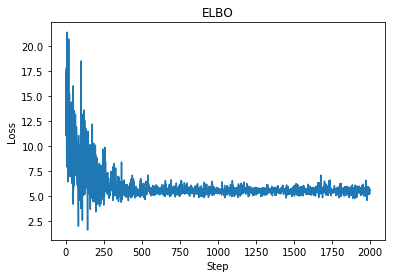

In [13]:
plt.plot(losses)
plt.title("ELBO")
plt.xlabel("Step")
plt.ylabel("Loss");

# Plot traces of variational hyper-parameters

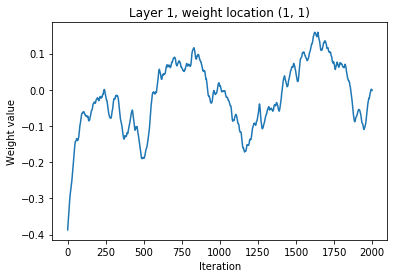

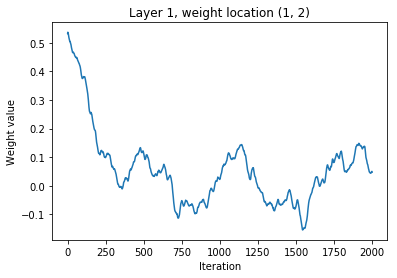

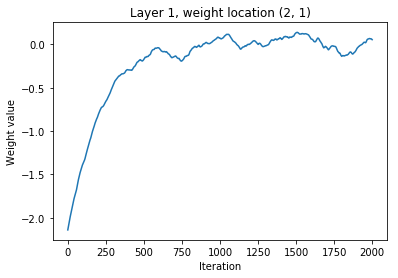

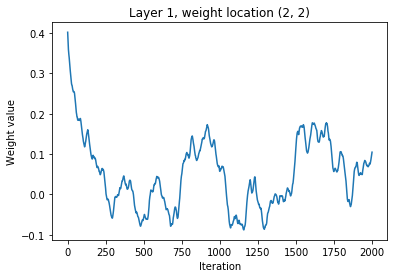

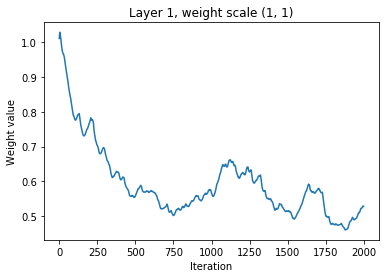

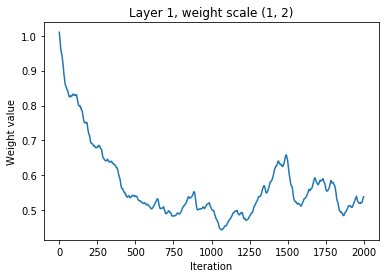

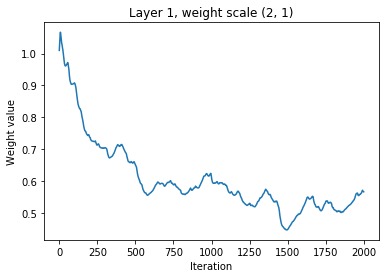

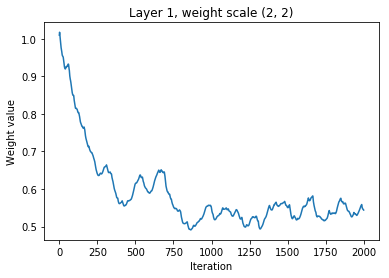

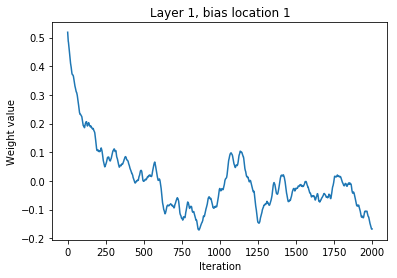

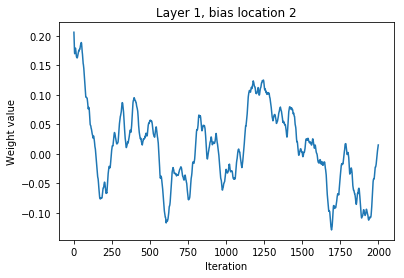

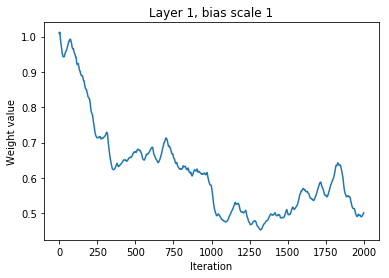

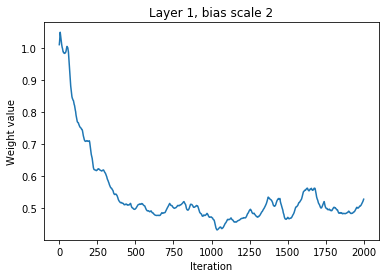

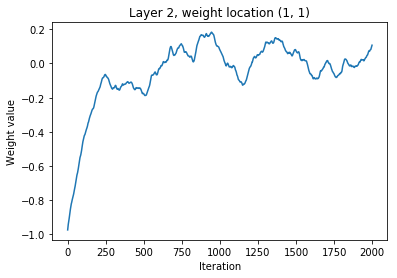

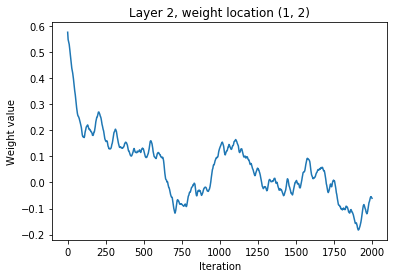

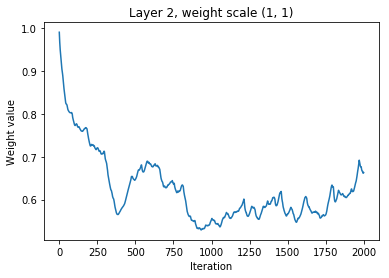

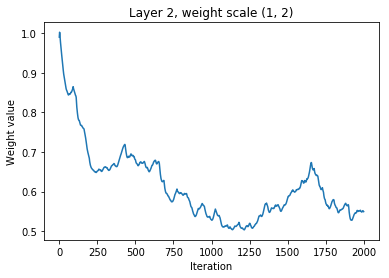

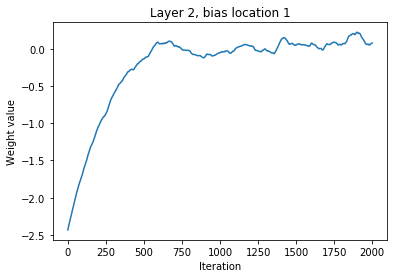

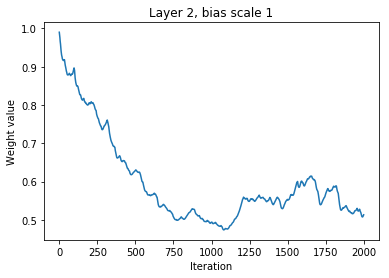

In [14]:
k = 1
for i in range(mlp.fc1.weight.shape[0]):
    for j in range(mlp.fc1.weight.shape[1]):
        plt.figure()
        plt.plot([fc1_weight_loc[l][i, j].item() for l in range(len(fc1_weight_loc))])
        plt.xlabel('Iteration')
        plt.ylabel('Weight value')
        plt.title(r'Layer 1, weight location ({}, {})'.format(i+1, j+1))
    
        k = k+1
        
k = 1
for i in range(mlp.fc1.weight.shape[0]):
    for j in range(mlp.fc1.weight.shape[1]):
        plt.figure()
        plt.plot([fc1_weight_scale[l][i, j].item() for l in range(len(fc1_weight_scale))])
        plt.xlabel('Iteration')
        plt.ylabel('Weight value')
        plt.title(r'Layer 1, weight scale ({}, {})'.format(i+1, j+1))
    
        k = k+1
        
k = 1
for i in range(mlp.fc1.bias.shape[0]):
    plt.figure()
    plt.plot([fc1_bias_loc[l][i].item() for l in range(len(fc1_bias_loc))])
    plt.xlabel('Iteration')
    plt.ylabel('Weight value')
    plt.title(r'Layer 1, bias location {}'.format(i+1))
    
    k = k+1
        
k = 1
for i in range(mlp.fc1.bias.shape[0]):
    plt.figure()
    plt.plot([fc1_bias_scale[l][i].item() for l in range(len(fc1_bias_scale))])
    plt.xlabel('Iteration')
    plt.ylabel('Weight value')
    plt.title(r'Layer 1, bias scale {}'.format(i+1))
    
    k = k+1

k = 1
for i in range(mlp.fc2.weight.shape[0]):
    for j in range(mlp.fc2.weight.shape[1]):
        plt.figure()
        plt.plot([fc2_weight_loc[l][i, j].item() for l in range(len(fc2_weight_loc))])
        plt.xlabel('Iteration')
        plt.ylabel('Weight value')
        plt.title(r'Layer 2, weight location ({}, {})'.format(i+1, j+1))
    
        k = k+1
        
k = 1
for i in range(mlp.fc2.weight.shape[0]):
    for j in range(mlp.fc2.weight.shape[1]):
        plt.figure()
        plt.plot([fc2_weight_scale[l][i, j].item() for l in range(len(fc2_weight_scale))])
        plt.xlabel('Iteration')
        plt.ylabel('Weight value')
        plt.title(r'Layer 2, weight scale ({}, {})'.format(i+1, j+1))
    
        k = k+1
        
k = 1
for i in range(mlp.fc2.bias.shape[0]):
    plt.figure()
    plt.plot([fc2_bias_loc[l][i].item() for l in range(len(fc2_bias_loc))])
    plt.xlabel('Iteration')
    plt.ylabel('Weight value')
    plt.title(r'Layer 2, bias location {}'.format(i+1))
    
    k = k+1
        
k = 1
for i in range(mlp.fc2.bias.shape[0]):
    plt.figure()
    plt.plot([fc2_bias_scale[l][i].item() for l in range(len(fc2_bias_scale))])
    plt.xlabel('Iteration')
    plt.ylabel('Weight value')
    plt.title(r'Layer 2, bias scale {}'.format(i+1))
    
    k = k+1

# Sample from variational predictive posterior probability mass function

In what follows, predictions will be made using the training data `x_data` and `y_data` for demonstration purposes. Instead, one would use test instead of training data. For this example, the training data for XOR cover the spectrum of all possible cases.

Evaluating the `model()` function returns the estimated logits:

In [15]:
lhat = model(mlp, x_data, y_data)
lhat

tensor([[-1.3979],
        [-1.3231],
        [-1.4333],
        [-1.3941]])

The `sample_with_model()` function samples a label. Notice that the `pyro.sample()` function in the body of `sample_with_model()` does not take an `obs` input argument, whereas the `pyro.sample()` function in the body of `model()` takes an `obs` input argument. Providing the `obs` input argument sets the output of `pyro.sample()` to be the value of `obs`.

In [16]:
def sample_with_model(mlp, x_data, y_data):
    return pyro.sample("prediction", dist.Categorical(logits=model(mlp, x_data, y_data).view(-1)))

Sample from the predictive posterior probability mass function (PMF):

In [17]:
sample_with_model(mlp, x_data, y_data)

tensor(2)

Define the variational posterior PMF:

In [18]:
variational_posterior = svi.run(x_data, y_data)

The trace predictive posterior samples labels using the mechanism of the model predictive posterior for model parameters sampled from the variational posterior. In the example below, model parameters (weights and biases) are sampled from `variational_posterior` and labels are sampled from `sample_with_model` given the weights and biases drawn from `variational_posterior`. For more details, see [the relevant documentation](http://docs.pyro.ai/en/0.3.0-release/inference_algos.html?highlight=tracepredictive#module-pyro.infer.abstract_infer).

In [19]:
trace_predictive_posterior = TracePredictive(lambda x_data, ydata: sample_with_model(mlp, x_data, y_data),
                                             variational_posterior,
                                             num_samples=10000)

In [20]:
predictive_posterior = trace_predictive_posterior.run(x_data, None)

Define the empirical marginal for `prediction` (see [the relevant documentation](http://docs.pyro.ai/en/0.3.0-release/inference_algos.html?highlight=tracepredictive#module-pyro.infer.abstract_infer)):

In [21]:
empirical_marginal = EmpiricalMarginal(predictive_posterior, sites="prediction")

Draw a sample from the empirical marginal of predictions:

In [22]:
empirical_marginal.sample()

tensor(1)

Get the samples associated with the empirical marginal of predictions:

In [23]:
samples_and_weights = empirical_marginal._get_samples_and_weights()

In [24]:
if torch.cuda.is_available():
    samples = samples_and_weights[0].cpu().detach().numpy()
else:
    samples = samples_and_weights[0].detach().numpy()

samples

array([3, 1, 0, ..., 0, 3, 2])

The predictive posterior approximates a Categorical distribution with weights $(0.25, 0.25, 0.25, 0.25)$.

In [25]:
np.bincount(samples)

array([2539, 2485, 2617, 2359])

In [26]:
np.bincount(samples)/sum(np.bincount(samples))

array([0.2539, 0.2485, 0.2617, 0.2359])

# Addendum: tensor shapes in Pyro

[This documentation](https://pyro.ai/examples/tensor_shapes.html) introduces tensor dimensions in Pyro. While PyTorch tensors have a single `.shape` attribute, a Pyro tensor related to distributions has three shape attributes, namely `.sample_shape`, `.batch_shape` and `.event_shape`. The following table displays the relation between shape type and statistical dependence among variables.

| Shape        | Dependence  |
|--------------|-------------|
| sample_shape | IID         |
| batch_shape  | Independent |
| event_shape  | Dependent   |

The total shape of `.log_prob()` is `.batch_shape`, and the shape of a tensor returned by `Distribution.sample()` is equal to the sum of `.sample_shape`, `.batch_shape` and `.event_shape`. The examples below demonstrate tensor shapes in Pyro.

In [27]:
d = dist.Normal(torch.zeros(2, 2), torch.ones(2, 2))
print("d.shape =", d.shape)
print("d.batch_shape =", d.batch_shape)
print("d.event_shape =", d.event_shape)

x = pyro.sample("x", d)
print("sample shape =", x.shape)
print("sample =", x)

p = d.log_prob(x)
print("log_prob shape =", p.shape)
print("log_prob =", p)

d.shape = <bound method TorchDistributionMixin.shape of Normal(loc: torch.Size([2, 2]), scale: torch.Size([2, 2]))>
d.batch_shape = torch.Size([2, 2])
d.event_shape = torch.Size([])
sample shape = torch.Size([2, 2])
sample = tensor([[ 1.4193, -0.7249],
        [ 0.8657, -2.7931]])
log_prob shape = torch.Size([2, 2])
log_prob = tensor([[-1.9261, -1.1817],
        [-1.2937, -4.8197]])


In [28]:
d = dist.Normal(torch.zeros(2, 2), torch.ones(2, 2)).to_event(2)
print("d.shape =", d.shape)
print("d.batch_shape =", d.batch_shape)
print("d.event_shape =", d.event_shape)

x = pyro.sample("x", d)
print("sample shape =", x.shape)
print("sample =", x)

p = d.log_prob(x)
print("log_prob shape =", p.shape)
print("log_prob =", p)

d.shape = <bound method TorchDistributionMixin.shape of Independent()>
d.batch_shape = torch.Size([])
d.event_shape = torch.Size([2, 2])
sample shape = torch.Size([2, 2])
sample = tensor([[-0.5231,  0.4753],
        [-0.1503, -2.1688]])
log_prob shape = torch.Size([])
log_prob = tensor(-6.2887)


In [29]:
d = dist.MultivariateNormal(
    torch.zeros(4),
    torch.tensor([
        [1, 0.75, 0.5, 0.25],
        [0.75, 1, 0.75, 0.5],
        [0.5, 0.75, 1, 0.75],
        [0.25, 0.5, 0.75, 1]]))
print("d.shape =", d.shape)
print("d.batch_shape =", d.batch_shape)
print("d.event_shape =", d.event_shape)

x = pyro.sample("x", d)
print("sample shape =", x.shape)
print("sample =", x)

p = d.log_prob(x)
print("log_prob shape =", p.shape)
print("log_prob =", p)

d.shape = <bound method TorchDistributionMixin.shape of MultivariateNormal(loc: torch.Size([4]), covariance_matrix: torch.Size([4, 4]))>
d.batch_shape = torch.Size([])
d.event_shape = torch.Size([4])
sample shape = torch.Size([4])
sample = tensor([-0.4554, -1.4819, -1.4311, -0.9647])
log_prob shape = torch.Size([])
log_prob = tensor(-4.0782)


In [30]:
s = list(mlp.fc1.weight.shape)
print("Length of weight tensor shape for first layer =", len(s))
print("Weight tensor shape for first layer =", s)

d = normal(s)
print("d.shape =", d.shape)
print("d.batch_shape =", d.batch_shape)
print("d.event_shape =", d.event_shape)

x = pyro.sample("x", d)
print("sample shape =", x.shape)
print("sample =", x)

p = d.log_prob(x)
print("log_prob shape =", p.shape)
print("log_prob =", p)

Length of weight tensor shape for first layer = 2
Weight tensor shape for first layer = [2, 2]
d.shape = <bound method TorchDistributionMixin.shape of Independent()>
d.batch_shape = torch.Size([])
d.event_shape = torch.Size([2, 2])
sample shape = torch.Size([2, 2])
sample = tensor([[ 0.8054, -1.3949],
        [ 0.6713, -1.0915]])
log_prob shape = torch.Size([])
log_prob = tensor(-5.7939)


In [31]:
s = list(mlp.fc1.weight.shape)
print("Length of weight tensor shape for first layer =", len(s))
print("Weight tensor shape for first layer =", s)

d = variational_normal("fc1_weight", nn.Softplus(), s)
print("d.shape =", d.shape)
print("d.batch_shape =", d.batch_shape)
print("d.event_shape =", d.event_shape)

x = pyro.sample("x", d)
print("sample shape =", x.shape)
print("sample =", x)

p = d.log_prob(x)
print("log_prob shape =", p.shape)
print("log_prob =", p)

Length of weight tensor shape for first layer = 2
Weight tensor shape for first layer = [2, 2]
d.shape = <bound method TorchDistributionMixin.shape of Independent()>
d.batch_shape = torch.Size([])
d.event_shape = torch.Size([2, 2])
sample shape = torch.Size([2, 2])
sample = tensor([[-0.1201,  0.5773],
        [ 0.7027,  0.0051]], grad_fn=<AddBackward0>)
log_prob shape = torch.Size([])
log_prob = tensor(-4.0390, grad_fn=<SumBackward2>)


In [32]:
s = list(mlp.fc1.bias.shape)
print("Length of weight tensor shape for first layer =", len(s))
print("Weight tensor shape for first layer =", s)

d = normal(s)
print("d.shape =", d.shape)
print("d.batch_shape =", d.batch_shape)
print("d.event_shape =", d.event_shape)

x = pyro.sample("x", d)
print("sample shape =", x.shape)
print("sample =", x)

p = d.log_prob(x)
print("log_prob shape =", p.shape)
print("log_prob =", p)

Length of weight tensor shape for first layer = 1
Weight tensor shape for first layer = [2]
d.shape = <bound method TorchDistributionMixin.shape of Independent()>
d.batch_shape = torch.Size([])
d.event_shape = torch.Size([2])
sample shape = torch.Size([2])
sample = tensor([0.8959, 0.0435])
log_prob shape = torch.Size([])
log_prob = tensor(-2.2401)


In [33]:
s = list(mlp.fc1.bias.shape)
print("Length of weight tensor shape for first layer =", len(s))
print("Weight tensor shape for first layer =", s)

d = variational_normal("fc1_bias", nn.Softplus(), s)
print("d.shape =", d.shape)
print("d.batch_shape =", d.batch_shape)
print("d.event_shape =", d.event_shape)

x = pyro.sample("x", d)
print("sample shape =", x.shape)
print("sample =", x)

p = d.log_prob(x)
print("log_prob shape =", p.shape)
print("log_prob =", p)

Length of weight tensor shape for first layer = 1
Weight tensor shape for first layer = [2]
d.shape = <bound method TorchDistributionMixin.shape of Independent()>
d.batch_shape = torch.Size([])
d.event_shape = torch.Size([2])
sample shape = torch.Size([2])
sample = tensor([-0.5663, -0.9619], grad_fn=<AddBackward0>)
log_prob shape = torch.Size([])
log_prob = tensor(-2.3732, grad_fn=<SumBackward2>)


In [34]:
s = list(mlp.fc2.weight.shape)
print("Length of weight tensor shape for first layer =", len(s))
print("Weight tensor shape for first layer =", s)

d = normal(s)
print("d.shape =", d.shape)
print("d.batch_shape =", d.batch_shape)
print("d.event_shape =", d.event_shape)

x = pyro.sample("x", d)
print("sample shape =", x.shape)
print("sample =", x)

p = d.log_prob(x)
print("log_prob shape =", p.shape)
print("log_prob =", p)

Length of weight tensor shape for first layer = 2
Weight tensor shape for first layer = [1, 2]
d.shape = <bound method TorchDistributionMixin.shape of Independent()>
d.batch_shape = torch.Size([])
d.event_shape = torch.Size([1, 2])
sample shape = torch.Size([1, 2])
sample = tensor([[-0.1739,  0.2670]])
log_prob shape = torch.Size([])
log_prob = tensor(-1.8886)


In [35]:
s = list(mlp.fc2.weight.shape)
print("Length of weight tensor shape for first layer =", len(s))
print("Weight tensor shape for first layer =", s)

d = variational_normal("fc2_weight", nn.Softplus(), s)
print("d.shape =", d.shape)
print("d.batch_shape =", d.batch_shape)
print("d.event_shape =", d.event_shape)

x = pyro.sample("x", d)
print("sample shape =", x.shape)
print("sample =", x)

p = d.log_prob(x)
print("log_prob shape =", p.shape)
print("log_prob =", p)

Length of weight tensor shape for first layer = 2
Weight tensor shape for first layer = [1, 2]
d.shape = <bound method TorchDistributionMixin.shape of Independent()>
d.batch_shape = torch.Size([])
d.event_shape = torch.Size([1, 2])
sample shape = torch.Size([1, 2])
sample = tensor([[-2.3819, -2.1681]], grad_fn=<AddBackward0>)
log_prob shape = torch.Size([])
log_prob = tensor(-6.7780, grad_fn=<SumBackward2>)


In [36]:
s = list(mlp.fc2.bias.shape)
print("Length of weight tensor shape for first layer =", len(s))
print("Weight tensor shape for first layer =", s)

d = normal(s)
print("d.shape =", d.shape)
print("d.batch_shape =", d.batch_shape)
print("d.event_shape =", d.event_shape)

x = pyro.sample("x", d)
print("sample shape =", x.shape)
print("sample =", x)

p = d.log_prob(x)
print("log_prob shape =", p.shape)
print("log_prob =", p)

Length of weight tensor shape for first layer = 1
Weight tensor shape for first layer = [1]
d.shape = <bound method TorchDistributionMixin.shape of Independent()>
d.batch_shape = torch.Size([])
d.event_shape = torch.Size([1])
sample shape = torch.Size([1])
sample = tensor([-0.1010])
log_prob shape = torch.Size([])
log_prob = tensor(-0.9240)


In [37]:
s = list(mlp.fc2.bias.shape)
print("Length of weight tensor shape for first layer =", len(s))
print("Weight tensor shape for first layer =", s)

d = variational_normal("fc2_bias", nn.Softplus(), s)
print("d.shape =", d.shape)
print("d.batch_shape =", d.batch_shape)
print("d.event_shape =", d.event_shape)

x = pyro.sample("x", d)
print("sample shape =", x.shape)
print("sample =", x)

p = d.log_prob(x)
print("log_prob shape =", p.shape)
print("log_prob =", p)

Length of weight tensor shape for first layer = 1
Weight tensor shape for first layer = [1]
d.shape = <bound method TorchDistributionMixin.shape of Independent()>
d.batch_shape = torch.Size([])
d.event_shape = torch.Size([1])
sample shape = torch.Size([1])
sample = tensor([-0.9908], grad_fn=<AddBackward0>)
log_prob shape = torch.Size([])
log_prob = tensor(-1.4923, grad_fn=<SumBackward2>)
